# Inference and Hypothesis testing


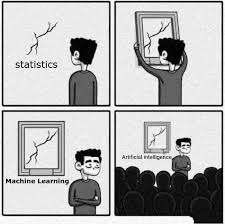



<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Inferential-Statistics" data-toc-modified-id="Inferential-Statistics-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Inferential Statistics</a></span><ul class="toc-item"><li><span><a href="#Sampling-distributions" data-toc-modified-id="Sampling-distributions-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Sampling distributions</a></span></li><li><span><a href="#The-central-limit-Theorem" data-toc-modified-id="The-central-limit-Theorem-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>The central limit Theorem</a></span><ul class="toc-item"><li><span><a href="#Standard-Error" data-toc-modified-id="Standard-Error-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Standard Error</a></span></li><li><span><a href="#Confidence-interval" data-toc-modified-id="Confidence-interval-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Confidence interval</a></span></li></ul></li></ul></li><li><span><a href="#Hypothesis-testing" data-toc-modified-id="Hypothesis-testing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Hypothesis testing</a></span><ul class="toc-item"><li><span><a href="#Is-this-coin-fair?" data-toc-modified-id="Is-this-coin-fair?-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Is this coin fair?</a></span></li></ul></li><li><span><a href="#Choosing-statistical-tests" data-toc-modified-id="Choosing-statistical-tests-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Choosing statistical tests</a></span><ul class="toc-item"><li><span><a href="#Z-test" data-toc-modified-id="Z-test-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Z-test</a></span></li><li><span><a href="#t-test:-Brexit" data-toc-modified-id="t-test:-Brexit-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>t-test: Brexit</a></span></li><li><span><a href="#Were-older-people-more-in-favour-of-Brexit?" data-toc-modified-id="Were-older-people-more-in-favour-of-Brexit?-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Were older people more in favour of Brexit?</a></span><ul class="toc-item"><li><span><a href="#Is-my-data-Normal?" data-toc-modified-id="Is-my-data-Normal?-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Is my data Normal?</a></span></li></ul></li><li><span><a href="#t-test:-another-one" data-toc-modified-id="t-test:-another-one-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>t-test: another one</a></span></li></ul></li><li><span><a href="#ANOVA" data-toc-modified-id="ANOVA-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>ANOVA</a></span></li><li><span><a href="#p-hacking" data-toc-modified-id="p-hacking-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>p-hacking</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#References-&amp;-further-materials" data-toc-modified-id="References-&amp;-further-materials-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>References &amp; further materials</a></span><ul class="toc-item"><li><span><a href="#BONUS:-Bootstrap" data-toc-modified-id="BONUS:-Bootstrap-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>BONUS: Bootstrap</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

import pandas as pd
np.random.seed()

from scipy.stats import trim_mean, mode, skew, gaussian_kde, pearsonr, spearmanr, beta
from statsmodels.stats.weightstats import ztest as ztest
from scipy.stats import ttest_ind, norm, t
from scipy.stats import f_oneway

## Inferential Statistics

In real life situations we only have access to samples of data, not to the entire population. Then, how can we draw conclusions about the underlying population as a whole? How confident can we be with this conclusions? The answer lies in the *Inferential Statistics*

### Sampling distributions

Imagine the "real" distribution of salaries in Spain is as follows: 

In [7]:
population_mean = 23646.50 # €
population_std = 5000
population = 47000000 # people
actual_population = np.random.normal(population_mean, population_std, population)

In [8]:
actual_population[:10]

array([22326.07528082, 22234.05272809, 21515.74634993, 28283.68925185,
       25232.33387524, 26070.97983849, 29685.01835922, 23326.79679803,
       23404.42718222, 31133.58369304])

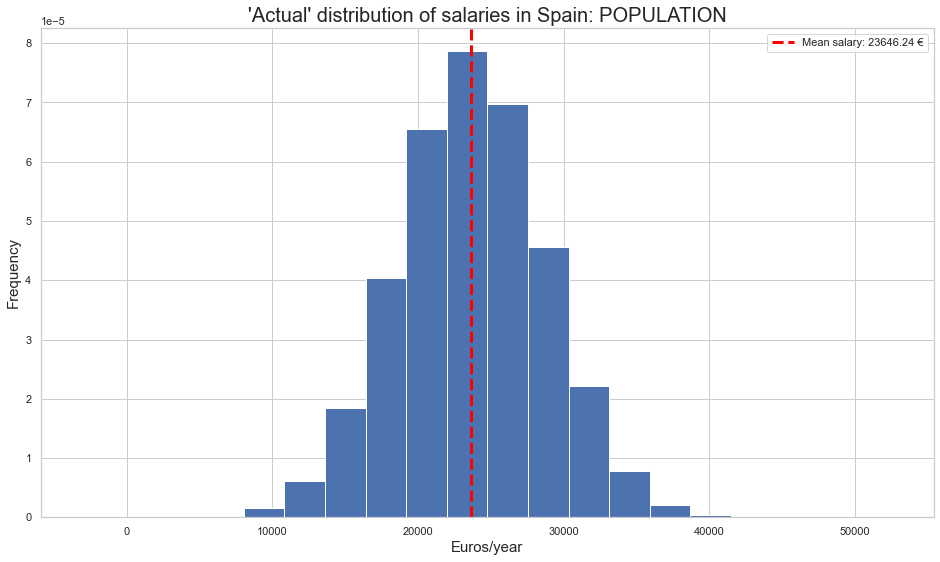

In [5]:
plt.hist(actual_population, bins=20, density=True)
plt.axvline(np.mean(actual_population), c="red", linestyle="--", linewidth=3, label=f"Mean salary: {round(np.mean(actual_population), 2)} €")
plt.legend()
plt.title("'Actual' distribution of salaries in Spain: POPULATION", fontsize=20)
plt.xlabel("Euros/year", fontsize=15)
plt.ylabel("Frequency", fontsize=15);

What if you had to *infer* the mean salary based on a sample?

In [61]:
sample_size = 25

In [56]:
sample = np.random.normal(population_mean, population_std, sample_size)

In [57]:
np.mean(actual_population)

23646.498410882527

In [58]:
#sample

In [59]:
round(np.mean(actual_population) - sample.mean(), 3)

21.641

Repeating this over and over would give us the **sampling distribution** (of the mean, in this case). With that, we can have an idea of how good our estimate is.

**Sample distribution step-by-step**
* **Draw 1000 samples** of size 25 from the population of salaries.
* Record the **average of each sample** in a list
* Plot the **distribution of the averages**
* What is the average of the averages?

In [46]:
sample_size = 25
list_of_samples = [np.mean(np.random.normal(population_mean, population_std, sample_size))  for _ in range(1000)]

In [47]:
list_of_samples[:10]

[23855.069059240064,
 23890.108131692043,
 24246.64740709686,
 22288.82424743924,
 24215.355451831758,
 23198.259464031464,
 24382.019795168253,
 24473.64784733844,
 24698.23642913592,
 24323.790558253022]

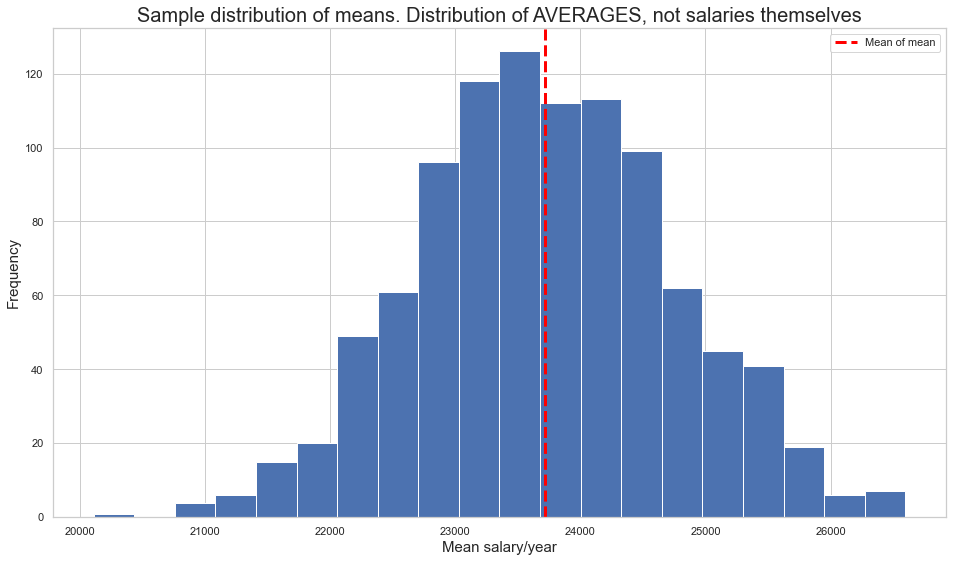

In [49]:
plt.hist(list_of_samples, bins=20)
plt.axvline(np.mean(list_of_samples), c="red", linewidth=3, linestyle="--", label="Mean of mean")

plt.legend()
plt.title("Sample distribution of means. Distribution of AVERAGES, not salaries themselves", fontsize=20)
plt.xlabel("Mean salary/year", fontsize=15)
plt.ylabel("Frequency", fontsize=15);

In [ ]:
np.mean()

In [54]:
f"{round(abs(np.mean(list_of_samples) - np.mean(actual_population)), 2)} € of error"

'73.44 € of error'

### The central limit Theorem

Code snippet extracted from [Geeks for Geeks](https://www.geeksforgeeks.org/python-central-limit-theorem/#:~:text=The%20definition%3A,from%20which%20we%20are%20sampling.&text=The%20distribution%20of%20the%20sample,as%20the%20sample%20size%20increases.)

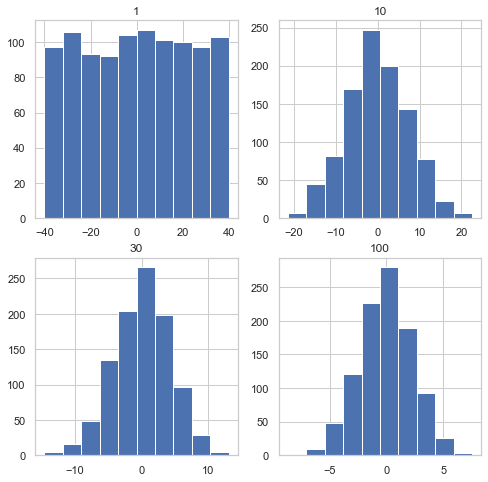

In [64]:
# Number of samples
num = [1, 10, 30, 100]


# List of sample_means

means = []


# Generating 1, 10, 30, 100 random numbers from -40 to 40
# taking their mean and appending it to a list of means
for j in num:
    np.random.seed(1)
    x = [np.mean(np.random.uniform(-40, 40, j)) for _ in range(1000)]
    means.append(x)

    
# Now: plotting
k = 0
fig, ax = plt.subplots(2, 2, figsize = (8, 8))
for i in range(0, 2):
    for j in range(0, 2):
        ax[i, j].hist(means[k], 10)
        ax[i, j].set_title(label = num[k])
        k += 1
        
#plt.title("A thousand samples of sizes: 1, 10, 30 & 100")

We want to see that as the sampling grows in size, the sampling distribution tends to normalize:

- First plot (1): mean(ONE THOUSAND uniform distributions of 1 value each)
- Second plot (10): mean(ONE THOUSAND uniform distributions of 10 values each)
- Third plot (30): mean(ONE THOUSAND uniform distributions of 30 values each)
- Fourth plot (100): mean(ONE THOUSAND uniform distributions of 100 values each)

**Central Limit Theorem (CLT)**


Let $X_1,...,X_n$ be a random sample from a distribution with mean $\mu$ and variance $\sigma^2$. Define
$$\bar{X} = \frac{1}{n} \sum_i x_i.$$

The CLT states that as $n$ goes to infinity that
$$\bar{X} \sim \mbox{N}(\mu,\sigma^2/n).$$

Or, put it in simpler words: **regardless of the shape of
the population distribution** of $X$, as the sample size $n$ gets larger,
the sampling distribution of $\bar{X}$ becomes increasingly closer to
normal, with mean $\mu$ and variance $\sigma^2 / n$. (As long as $\mu$ and $\sigma$ are finite quantities.)


#### Standard Error

The theory stablishes that:

$$SE = \hat\sigma /\sqrt{n} $$


The standard error (SE) of a statistic is the standard deviation of its sampling distribution or an estimate of that standard deviation.

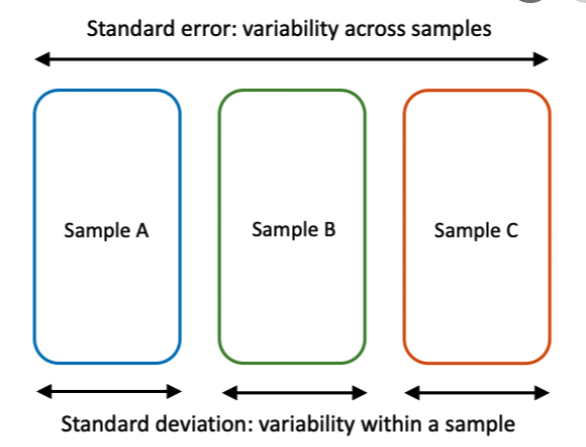

In [66]:
empirical_standard_error = np.std(sample) / np.sqrt(sample_size)

In [67]:
empirical_standard_error

995.0728409619021

#### Confidence interval


It is  a range that includes a given fraction of the sampling distribution. Typicall values are 90%, 95%, and 99%. This proposes a range of plausible values for an unknown parameter (for example, the mean). 

The interval has an associated confidence level.  The confidence level represents the frequency (i.e. the proportion) of confidence intervals that contain the true value of the unknown population parameter across many independent experiments. 


**Remember:** 95% confidence interval does not mean 95% probability. (Bayesian confidence intervals can be interpreted that way though)

Taken mostly from [Wikipedia](https://en.wikipedia.org/wiki/Confidence_interval).
See also this blog from [Towardsdatascience](https://towardsdatascience.com/a-complete-guide-to-confidence-interval-and-examples-in-python-ff417c5cb593).

See [this section from Wikipedia](https://en.wikipedia.org/wiki/Confidence_interval#Basic_steps) to get the basic steps:





The theory stablishes that the 95% CI can be obtained as:

$$\left[ \hat\mu -1.96 * SE, \hat\mu +1.96 * SE \right]$$


Other typical two sided confidence levels are obtained by changing the 1.96 factor by another ones:

|  CI |  z* |
|---|---|
| 99%  | 2.576  | 
|  98% |  2.326 |   
|   95%|   1.96|
|90% |1.645|

In [191]:
# What would be the relationship between the confidence interval and percentiles is?

In [68]:
(np.mean(list_of_samples) - 1.96 * empirical_standard_error, np.mean(list_of_samples) + 1.96 * empirical_standard_error)  

(21769.59823154117, 25670.28376811183)

**Exercise**

Imagine you want to know the success rate of calling a client to sign up for your product. You have called 100 individuals and 10 of them did sign up.

For every individual signing up you make 10 euros. Every call costs you 0.4 euros.



Hint: the confidence interval for a proportion is similar than for the mean, but using this formula for the standard error:

$$SE = \sqrt{\hat{p}(1-\hat{p})/n} $$

where $\hat{p}$ is the empirical fraction of success cases and $n$ is the number of trials

In [71]:
success_rate = 0.1 #0.9
sample_size = 100

cost_per_call = 0.4
earning_per_sucess = 10

In [72]:
# CI: If I were to run this experiment 100 times, 95% of the times, i'd be that getting that result

In [73]:
SE = np.sqrt((success_rate * (1 - success_rate) / sample_size))

In [74]:
SE

0.030000000000000002

In [75]:
CI = success_rate - 2.576 * SE, success_rate + 2.576 * SE,

In [76]:
CI # .99

(0.022720000000000004, 0.17728)

In [77]:
CI[0] # lower bound

0.022720000000000004

In [78]:
CI[1] # upper bound

0.17728

In [80]:
worst_case_scenario = CI[0]
worst_case_scenario

0.022720000000000004

In [84]:
worst_case_scenario * earning_per_sucess

0.22720000000000004

In [85]:
expected_benefit_per_call = worst_case_scenario * earning_per_sucess - cost_per_call
expected_benefit_per_call

-0.17279999999999998

In [87]:
if expected_benefit_per_call < 0:
    print("It is not worth to try")
else:
    print("keep calling")

It is not worth to try


In [82]:
best_case_scenario = CI[1]
best_case_scenario

0.17728

It is important to remember that confidence intervals and standard errors
only quantify sampling error; that is, error due to measuring only part of the
population. The sampling distribution does not account for other sources of
error, notably **sampling bias** and **measurement error**.

**NOTE**: Read this blog from [Towardsdatascience](https://towardsdatascience.com/a-complete-guide-to-confidence-interval-and-examples-in-python-ff417c5cb593) to know how to calculate CI for other statistics.

## Hypothesis testing

Adapted from [Think Stats](http://greenteapress.com/thinkstats2/thinkstats2.pdf):


The goal of classical hypothesis testing is to answer the question, “Given a
sample and an apparent effect, what is the probability of seeing such an effect
by chance?” Here’s how we answer that question:


* The first step is to quantify the size of the apparent effect by choosing a **test statistic**. 
* The second step is to define a **null hypothesis**, which is a model of the system based on the assumption that the apparent effect is not real (i.e that it can be due to chance).
* The third step is to compute a **p-value**, which is the probability of seeing the apparent effect if the null hypothesis is true.

* The last step is to interpret the result. If the p-value is low, the effect
s said to be **statistically significant**, which means that it is unlikely to have occurred by chance. In that case we infer that the effect is more likely to appear in the larger population.

The logic of this process is similar to a proof by contradiction. To prove a mathematical statement, $A$, you assume temporarily that $A$ is false. If that assumption leads to a contradiction, you conclude that $A$ must actually be
true. Similarly, to test a hypothesis like, “This effect is real,” we assume, temporarily, that it is not. That’s the null hypothesis.
***

### Is this coin fair?

We toss a coin 250 times and see 140 heads and 110 tails...  
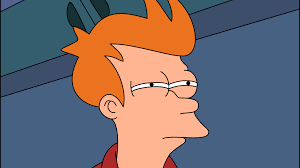


* **Null hypothesis**: The coin is fair. ($P(\text heads)=0.5$)
* **Alternative Hypothesis**: The coin is biased towards $heads$ (i.e. $p(heads) > 0.5$)

Flipping a coin 250 times in a row, 10000 times:

Typically 0.01, 0.05, 0.1 are significant values.

Beware that you can still be wrong in your decision!! In fact, the errors you can make in hypothesis testing have names:

|                       | In Fact H0 is True | In Fact H0 is False | 
|-----------------------|--------------------|---------------------|
| Test Decides H0 True  | Great!             | Type II Error       | 
| Test Decides H0 False | Type I Error       | Great!              |
|                       |                    |                     | 


Relatedly, you will here the term `statistical power` refering to $$\text{power}=\Pr{\big (}{\text{reject }}H_{0}\mid H_{1}{\text{ is true}}{\big )}$$

(It indicates the probability of avoiding a type II error). See also: https://machinelearningmastery.com/statistical-power-and-power-analysis-in-python/

In this case, we did not need to simulate because we know that the number of `heads` (success cases) when tossing a coin follows a `binomial distribution` 

Scipy version: `binomial test`

In [90]:
#binom()

* **Null Hypothesis** The difference in means is due to chance
* **Alternative Hyothesis** It is not due to chance


In [ ]:
"""
- What is the p_value?
    - "probability of your event ocurring"
    - "measure of likelihood"
    - "p of your event happening GIVEN the coin is fair"
    - "chance of observing the data if the H0 is true"
    - "how likely it is to get A result" 
    - "the result can fall within the acceptance area"

what: a probabilty
    of what: event happening
how: given the null hypothesis is true (coin is far, the drug doesnt work)
"""

# Hypothesis testing: steps

Hypothesis testing is a way to test the results of an experiment and see if you have meaningful results.

* **Null hypothesis:** Denoted with H0, a null hypothesis is an **assumption that the population average is identical to a specific value**. The typical notation is μ = μ0, where μ refers to the population mean and μ0 refers to the hypothesized value.
<br><br>
* **Alternate hypothesis:** An alternative hypothesis is the opposite of the null hypothesis. We compare this hypothesis with the null hypothesis to decide whether or not we reject the null hypothesis. We denote the alternative hypothesis with H1 or Ha.
<br><br>
* **Significance Level:** Indicates whether we are confident enough to reject the null hypothesis.
<br><br>
* **Test Statistic:** Once we determine the type of hypothesis test and that our assumptions have been met, we use our data to decide whether to reject or not reject the null hypothesis. (z-test, t-test)
<br><br>
* **p-value:** is a measure used to help us reject or not the null hypothesis


## Choosing statistical tests

- **z-test**: one sample, N more than 30 & std known
- **t-test**: N less than 30 OR two groups, std unkown
- **ANOVA**: mean from group1 is equal/not equal to mean of group2 is equal/not equal to group3

![](http://www.ttable.org/uploads/2/1/7/9/21795380/441541708.gif)

- The Z distribution is a special case of the normal distribution with a mean of 0 and standard deviation of 1. 

- The t-distribution is sensitive to sample size: used for small or moderate samples when the population standard deviation is unknown.

### Z-test

Boys of a certain age are known to have a mean weight of 85 pounds. A complaint is made that the boys living in a municipal children's home are underfed. As one bit of evidence, 35 boys (of the same age) are weighed and found to have a mean weight of 80.94 pounds. It is known that the population standard deviation is 11.6 pounds. Based on the available data, what should be concluded concerning the complaint? 
 
 
How to reason about the problem:

It is assumed that the population mean weight is 85, but we do not have the complete data from the population. Otherwise we would have calculated the actual mean directly. However we only have sample data from 35 subjects. So based on this sample data we will try to prove or disprove our assumption, using statistical test.

**Step 1:** Define the null hypothesis - This is our assumption about the population. It is defined by H0 and in this case H0: μ = 85;

**Step 2:** Define the alternative hypothesis - This means, what if our assumption is not true. It is defined by Ha and in this case Ha: μ < 85. 

**Step 3:** Determine if it is a one-tailed or a two-tailed test. Two-tailed is when the mean tested (alternative hypothesis) can be > or < then the mean of the population. In this case we are checking if the mean of the weight of the boys in the home is smaller then the mean of the population of boys, so we will consider it a one-tailed test.

**Step 4:** Decide a test statistics based on the information available. Assuming data is normally distributed and number of observations are more than 30 and population variance is known (since population standard deviation is provided), we will use a z-test. If the population variance was not known or the testing sample is less then 30, we use a t-test. This test is based on a "t-distribution" which is a normal distribution. T test is based on students t distribution which is very similar to a standard normal distribution except that it is much flatter.

<img src=https://education-team-2020.s3-eu-west-1.amazonaws.com/data-analytics/7.03/7.03-t_distribution.png width="500">


**Step 5:** Level of significance: This defines the rejection region/critical region, it's the probability of making the wrong decision when the null hypothesis is true. Usually it is 0.05. It is defined by greek letter 'alpha'. In the medical field this would go down to 0.01.
 
**Step 6:** Calculate the test statistic based on the given information.

**Step 7:** Check the table to determine the critical value.
<br> For z-test you have fixed values according to Confidence Level.
<br> For t-test you have to calculate according to the degrees of freedom (df), which is the *sample_size - 1*.

**Step 8:** Make conclusions:
* If the test statistic falls in the critical region, then we reject the Null Hypothesis
* If the test statistic falls in the region between the critical region, then we fail to reject the Null Hypothesis.

In [ ]:
# z-test
# one tailed
# alpha = 0.05

# p_value based on this


In [89]:
# POPULATION: reference

population_mean = 85
population_sd = 11.6
# are the parameters we need for any normal distribution


# sample
sample_mean = 80.94
n = 35

alpha = 0.05 #95 CI

In [90]:
data = np.random.normal(sample_mean, population_sd, n)

In [91]:
data

array([ 91.46349727,  61.89027304,  76.84996329,  71.14977247,
        90.44309429,  89.20686456,  77.1542717 ,  84.49179114,
        64.03458446,  80.71737399,  74.83500552,  90.89234309,
        75.53431311,  78.6505934 , 106.26459578,  86.38431801,
        79.19358276,  83.856413  ,  78.5454242 ,  80.34322448,
        83.77271063,  86.57647833,  91.00031087,  95.57590767,
        74.02586406,  81.92733742,  68.03399913,  64.14952834,
        51.05542385,  76.83782516,  76.0151533 ,  82.17475598,
        86.35334636,  56.37384452,  86.0863347 ])

In [92]:
from statsmodels.stats.weightstats import ztest as ztest

In [94]:
_, p_value = ztest(data, value = 85, alternative="smaller") # underfed

In [95]:
p_value

0.0018284953683093688

In [ ]:
# p_value is: likelihood of me getting this result given the H0 is true
# How likely is it I get an avge of 80.94 given they are not underfed

# P(80.94 | well-fed :) ) =  0.0018

In [96]:
alpha = 0.05

if p_value > alpha:
    print("This could happen. It is very likely. We don't have evidence to reject H0")
    
else:
    print("They are underfed. Very unlikely given the distribution of the population")

They are underfed. Very unlikely given the distribution of the population


In [ ]:
# We didn't kmnow if the were underfed
# so we did a test to check
# We found a result that is statistically significant 

### t-test: Brexit

If we assume a number of things about our underlying data, we can perform a t test. The more relevant are:


* Our observations must be independent of each other. 

* Normality of data - We assume that the sample is derived from a normally distributed data.



### Were older people more in favour of Brexit?

Every year, the Hansard Society sponsors a survey on political engagement in the UK. They put topical questions in each survey. For the 2016 / 17 survey, they asked about how people voted in the Brexit referendum.


#### Is my data Normal?

One of the great things about hypothesis testing is that once you understand the general procedure, you can simply look for the right test to perform depending on the effect you want to test --- of course, it is much better to really understand what you are doing... 

**Example**

You give your results from the t-test on Brexit ages to your Boss, but she doesn´t buy the hypothesys that the underlying data is normally distributed... 

Let´s convince her with another test!

You find `scipy.stats.normaltest` [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html). It says:

"Test whether a sample differs from a normal distribution"

* **null hypothesis** that a sample comes from a normal distribution

Then if the **p-value** returned by the function is smaller than 0.05 (the significance level that our boss wants) we can safely reject the null hypothesis -> the data do no come from a normal distribution. 

### t-test: another one

A psychologist was interested in exploring whether or not male and female college students have different driving behaviors. There were a number of ways that she could quantify driving behaviors. She opted to focus on the fastest speed ever driven by an individual. Therefore, the particular statistical question she framed was as follows:

* Is the mean fastest speed driven by male college students different than the mean fastest speed driven by female college students?
* She conducted a survey of a random n = 34 male college students and a random m = 29 female college students. Here is a descriptive summary of the results of her survey:
* sd: m_sd = 20.1, w_sd = 12.2


In [97]:
# Men
m_sample = 34
m_sample_mean = 105.5 #km/h
m_sd = 20.1


# Women
w_sample = 29
w_sample_mean = 90 #km/h
w_sd = 12.2

In [98]:
men = norm.rvs(m_sample_mean, m_sd, m_sample)
women = norm.rvs(w_sample_mean, w_sd, w_sample)

In [99]:
men

array([138.84231859, 113.57617404,  94.92497293, 121.74596713,
       116.08761896, 134.7087481 , 118.42516864, 143.37336831,
       132.83715643, 118.98164375, 119.47639926, 114.51580081,
       115.80607679, 110.65563954, 106.11722206,  94.24942433,
       138.29142636, 122.62783985, 103.8201394 , 112.43724081,
        93.45501414,  89.39580786, 105.7530269 , 109.37759605,
       100.4544741 , 117.99901943, 122.9535171 , 117.69431806,
       105.03728162,  98.16536486, 131.74624512,  90.85294242,
       112.56144238, 101.01787616])

In [100]:
women

array([104.01592053,  97.77290725,  97.46112477,  74.66014999,
        72.10349217,  88.77955018, 102.96719226,  91.86223675,
        87.26752558,  95.10786428,  93.01744793,  97.78240379,
        77.05109524,  83.38163566,  99.06525517,  93.65315492,
        95.59929047,  77.84315507,  76.97094771, 118.26663517,
        76.36928552,  87.82136378, 110.52519617,  74.95788941,
        75.4025899 ,  62.88682961,  74.40981038,  94.09090279,
        92.30905013])

In [102]:
_, p_value = ttest_ind(men, women)

In [103]:
p_value

8.54362376360809e-10

In [ ]:
# H0: driving speed is the same
# H1: men faster

In [105]:
if p_value > 0.05:
    print("Expected. We don't have enough evidence to reject H0.")
elif p_value < 0.05:
    print("Very unlikely it's due to chance of the sampling. There's a difference.")

Very unlikely it's due to chance of the sampling. There's a difference.


- We reject the null hypothesis. <br>
- We can say with 95% of confidence that we have enough evidence to discard the null hypothesis. <br>
- The average speed between male and females are not the same. <br>
- Comparing the means, and checking the positive t-statistic value we can say males drive faster. <br>
- Remember here we are talking about statistical significance of the value, here some tests on pvalue behavior:

## ANOVA

(Analysis of Variance)

What if we want to compare 3 or more population means?

* **Null hypothesis**: $\mu_1 = \mu_2 = \dots=\mu_n$
* **Alternative hypothesis**: at least one mean is different


Imagine you want to choose a school for your kids. You manage to get the data of the exam scores of some kids in 4 different schools
This is the data you have.

Does it make a difference to choose one over the other?

In [106]:
performance1 = [89, 89, 88, 78, 100]
performance2 = [93, 92, 88, 64, 100]
performance3 = [86, 53, 100, 87, 79]
performance4 = [89, 89, 80, 66, 95]

In [73]:
print(sum(performance1)/len(performance1))
print(sum(performance2)/len(performance2))
print(sum(performance3)/len(performance3))
print(sum(performance4)/len(performance4))

88.8
87.4
81.0
83.8


In [107]:
p_value_schools = f_oneway(performance1, performance2, performance3, performance4).pvalue
p_value_schools

0.7783575043146542

In [ ]:
# H0: no difference n means
# H1: some schools are better than others

In [109]:
if p_value_schools > 0.05:
    print("No evidence to reject H0")
else:
    print("Reject H0 and keep h1. Some school is better")

No evidence to reject H0


## p-hacking

https://www.youtube.com/watch?v=HDCOUXE3HMM

## Summary 




## References & further materials


* [Think Stats](https://greenteapress.com/wp/think-stats-2e/)
* [Practical Statistics for Data Scientists](https://www.oreilly.com/library/view/practical-statistics-for/9781491952955/)
* [Online Statistics Book](http://onlinestatbook.com/2/sampling_distributions/sampling_distributions.pdf)

### BONUS: Bootstrap

We can infer the values of some statistics with tricks as the ones described above and the CTL. But: can we do something more general for *any* statistic?

In [ ]:
import matplotlib as plt

Using bootstrapping consits on recreating a *fake* sampling distribution by solely having one sample! Let´s use this to calculate in a different way the above estimation for the mean and its CI.

1. Take values *with replacement* from your original sample until you get a new *bootstrapped* sample with the same size as the original.

2. Calculate the statistic you want to compute with this new sample

3. Repeat the process enough (10000) times so that you create a distribution of you statistic.

4. Get the estimate and its CI 

**Exercise**
Use the bootstrap method to estimate the Median of the distribution above and its 90% confidence interval.

In [ ]:
# your code here

**Note** Some [libraries in Python](https://github.com/cgevans/scikits-bootstrap) implement more sophisticated versions of Bootstrapping, but the idea is as simple and powerful as it looks like!

In [ ]:
"""
What is the p_value?

"evidence to check a h0"?

"theoretical value"
"P (result | coinFair) ""
P (underfed | median=85)





P (result | Ho) = 0-1
P (3ccats | female) = 0-1
P (17heads | coinIsFair)

PROBABILITY (value) of 
    getting a result
    assuming the H0 is true

p_value = 0-1

"""